In [27]:
from utils import *
debug = True

In [7]:
d_event_1000 = importdphideta(1000)
print(d_event_1000[0:5])

     phi    eta
0 -0.060 -2.065
1  0.017 -1.913
2 -0.071 -1.356
3 -0.009 -2.731
4  0.001 -0.569


In [82]:
d_event_0to500 = importdphidetarange(0, 500)
# add the negative itself to the list
d_event_0to500 = pd.concat([d_event_0to500, -1*d_event_0to500], ignore_index=True)

importing event  1
importing event  2
importing event  3
importing event  4
importing event  5
importing event  6
importing event  7
importing event  8
importing event  9
importing event  10
importing event  11
importing event  12
importing event  13
importing event  14
importing event  15
importing event  16
importing event  17
importing event  18
importing event  19
importing event  20
importing event  21
importing event  22
importing event  23
importing event  24
importing event  25
importing event  26
importing event  27
importing event  28
importing event  29
importing event  30
importing event  31
importing event  32
importing event  33
importing event  34
importing event  35
importing event  36
importing event  37
importing event  38
importing event  39
importing event  40
importing event  41
importing event  42
importing event  43
importing event  44
importing event  45
importing event  46
importing event  47
importing event  48
importing event  49
importing event  50
importing

In [63]:
def surfacedata(dfdata, dx = 0.5, dy = 0.5, rangex=3.15, rangey=4):
    phi_c = math.ceil(rangex*2/dx)
    eta_c = math.ceil(rangey*2/dy)
    phi_data = np.arange(-rangex, rangex, dx)+dx/2
    eta_data = np.arange(-rangey, rangey, dy)+dy/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] >= rangex or instance['phi'] <= -rangex or instance['eta'] >= rangey or instance['eta'] <= -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dx) 
        eta_index = math.floor((instance['eta']+rangey)/dy)
        z_data[phi_index][eta_index] += 1
        if index % 1000000 == 0 and debug:
            print("at",index)
    z_data = z_data.T
    return phi_data, eta_data, z_data/sum(z_data)

In [17]:
single_x, single_y, single_z = surfacedata(d_event_1000, 0.05, 1, 3.15, 6)

In [84]:
mixed_x, mixed_y, mixed_z = surfacedata(d_event_0to500, 0.25, 0.5, 3.15, 6)

at 0
at 1000000
at 2000000
at 3000000
at 4000000
at 5000000
at 6000000
at 7000000
at 8000000
at 9000000
at 10000000
at 11000000
at 12000000
at 13000000
at 14000000
at 15000000
at 16000000
at 17000000
at 18000000
at 19000000
at 20000000
at 21000000
at 22000000
at 23000000
at 24000000
at 25000000
at 26000000
at 27000000
at 28000000
at 29000000
at 30000000
at 31000000
at 32000000
at 33000000
at 34000000
at 35000000
at 36000000
at 37000000
at 38000000
at 39000000
at 40000000
at 41000000
at 42000000
at 43000000
at 44000000
at 45000000
at 46000000
at 47000000
at 48000000
at 49000000
at 50000000
at 51000000
at 52000000
at 53000000
at 54000000
at 55000000
at 56000000
at 57000000
at 58000000
at 59000000
at 60000000


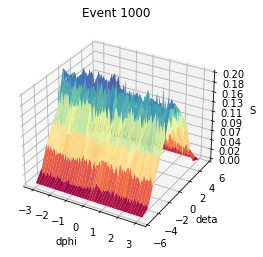

In [53]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = single_x
Y = single_y
X, Y = np.meshgrid(X, Y)
Z = single_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 1000')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/SingleEvent.png')
plt.show()

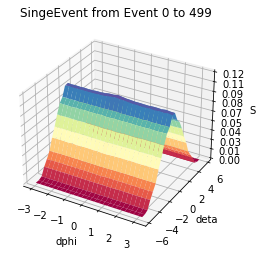

In [87]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = mixed_x
Y = mixed_y
X, Y = np.meshgrid(X, Y)
Z = mixed_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.12)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('SingeEvent from Event 0 to 499')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/SingeEvent0to499.png')
plt.show()

In [50]:
cor_z = np.divide(mixed_z, single_z, out=np.zeros_like(mixed_z), where=single_z!=0)
cor_z = cor_z/sum(cor_z)

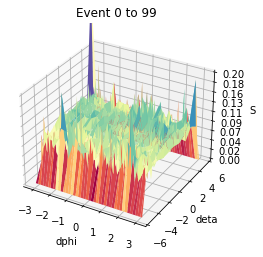

In [51]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = mixed_x
Y = mixed_y
X, Y = np.meshgrid(X, Y)
Z = cor_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0 to 99')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/Correlation.png')
plt.show()